---
layout: page
title: Um pouco Mais de Visualização de Dados
nav_order: 8
---
[<img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/icd-bradesco/blob/master/_lessons/08-MaisViz.ipynb)

# Tópico 8 – Um pouco Mais de Visualização de Dados 📈
{: .no_toc .mb-2 }

Aprender um pouco sobre transformação de dados e alguns exemplos a mais.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Aprender como transformar dados
1. Aprender qual a melhor forma de ter dados sobre postos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Agenda

- Distribuições.
- Histogramas de densidade.
- Parcelas sobrepostas.

### Revisão: tipos de visualizações

O tipo de visualização que criamos depende dos tipos de variáveis ​​que estamos visualizando.

- **Gráfico de dispersão**: numérico versus numérico.
- Exemplo: peso x altura.
- **Gráfico de linhas**: numérico sequencial (tempo) vs.
- Exemplo: altura vs. tempo.
- **Gráfico de barras**: categórico vs. numérico.
- Exemplo: alturas de diferentes membros da família.
- **Histograma**: distribuição numérica.

**Observação:** Podemos trocar as palavras "plot", "chart" e "graph"; todos eles significam a mesma coisa.

### Algumas visualizações ruins

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/08-MaisViz/images/bananas.png)

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/08-MaisViz/images/average_height.png)

![](https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/08-MaisViz/images/weather.png)

## Distribuições

### Qual é a distribuição de uma variável?

- A distribuição de uma variável consiste em todos os valores da variável que ocorrem nos dados, juntamente com suas frequências.
- As distribuições ajudam você a entender:
    - Com que frequência uma variável assume um determinado valor?_
- Ambas as variáveis ​​categóricas e numéricas têm distribuições.

### Variáveis ​​categóricas

A distribuição de uma variável categórica pode ser exibida como uma tabela ou gráfico de barras, entre outras formas! Por exemplo, vejamos qual o tipo de ensino médio dos alunos de FCD.

In [2]:
tipo_medio = pd.DataFrame().assign(
    TipoEscola=['Privado', 'Público (Estadual)', 'Público (Municipal)', 'Público (Federal)'], 
    NumDiscentes=[15, 8, 3, 7]
)
tipo_medio

,TipoEscola,NumDiscentes
0,Privado,15
1,Público (Estadual),8
2,Público (Municipal),3
3,Público (Federal),7


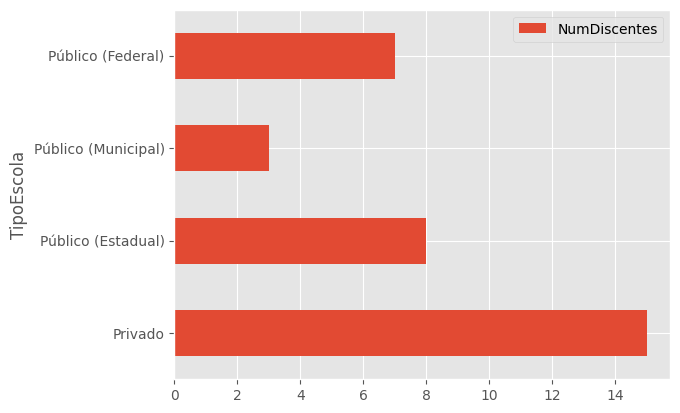

In [3]:
tipo_medio.plot(kind='barh', x='TipoEscola', y='NumDiscentes');

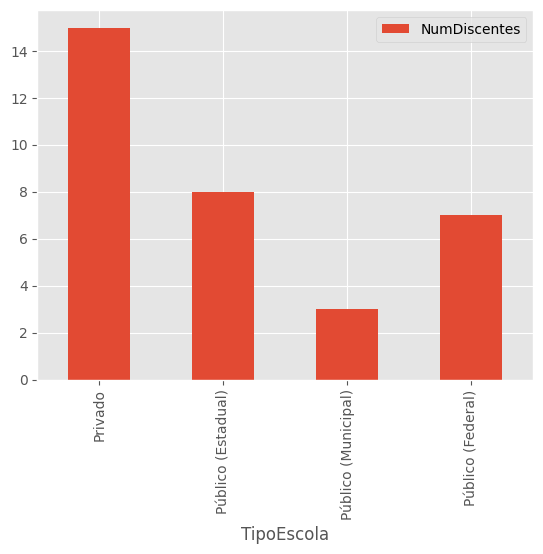

In [4]:
tipo_medio.plot(kind='bar', x='TipoEscola', y='NumDiscentes');

### Variáveis ​​numéricas

A distribuição de uma variável numérica nem sempre pode ser representada com precisão por um gráfico de barras. Por exemplo, vejamos o número de streams de cada uma das 200 músicas mais populares no Spotify nos EUA. 🎵

In [5]:
charts = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/07-DataViz/data/regional-us-daily-2023-01-21.csv')
charts = (charts.set_index('rank')
          .assign(million_streams = np.round(charts.get('streams')/1000000, 2))
          .get(['track_name', 'artist_names', 'streams', 'million_streams'])
         )
charts

,track_name,artist_names,streams,million_streams
rank,,,,
1,Flowers,Miley Cyrus,3356361,2.48
2,Kill Bill,SZA,2479445,1.34
3,Creepin' (with The Weeknd & 21 Savage),"Metro Boomin, The Weeknd, 21 Savage",1337320,1.24
4,Superhero (Heroes & Villains) [with Future & C...,"Metro Boomin, Future, Chris Brown",1235285,1.11
5,Rich Flex,"Drake, 21 Savage",1109704,1.05
...,...,...,...,...
196,"Burn, Burn, Burn",Zach Bryan,267772,0.27
197,LET GO,Central Cee,267401,0.27
198,Major Distribution,"Drake, 21 Savage",266986,0.27


Para ver a distribuição do número de streams, precisamos agrupar pela coluna `'million_streams'`.

In [6]:
stream_counts = charts.groupby('million_streams').count()
stream_counts = stream_counts.assign(Count=stream_counts.get('track_name')).drop(columns=['track_name', 'artist_names', 'streams'])
stream_counts

,Count
million_streams,
0.27,17
0.28,20
0.29,19
0.30,8
0.31,14
0.32,7
0.33,14
0.34,7
0.35,10


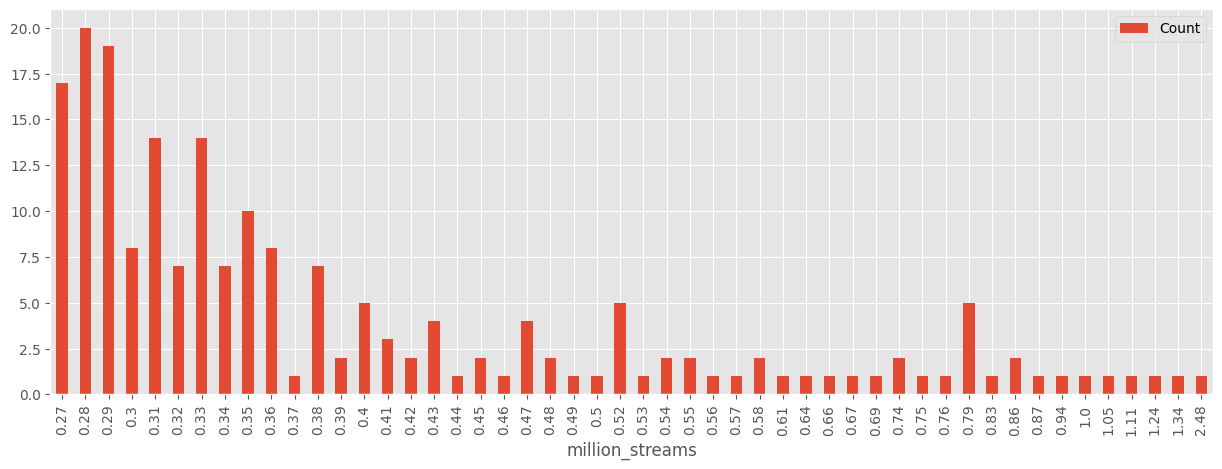

In [7]:
stream_counts.plot(kind='bar', y='Count', figsize=(15,5));

- Isso obscurece o fato de que as duas músicas principais são atípicas, com **muito mais streams** do que as outras músicas.

- O eixo horizontal deve ser numérico (como uma reta numérica), não categórico. Deve haver mais espaço entre certas barras do que outras.

## Histogramas

### Histogramas mostram a distribuição de variáveis ​​numéricas *sem normalizar*

Em vez de um gráfico de barras, visualizaremos a distribuição de uma variável numérica com um **histograma**. Vamos ver como é um histograma de densidade para `'million_streams'`. O que você percebe nessa visualização?

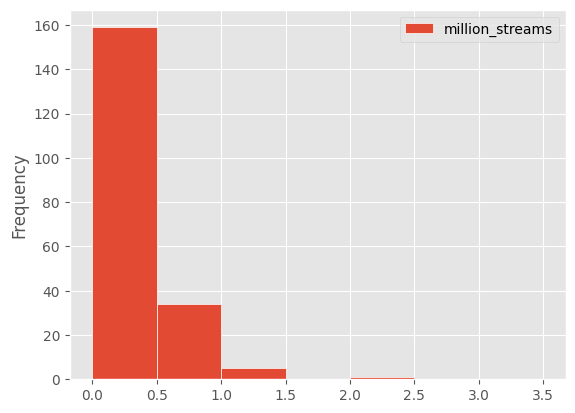

In [8]:
# Ignore the code for right now.
charts.plot(
    kind='hist',
    y='million_streams',
    bins=np.arange(0, 4, 0.5),
    ec='w'  # borda branca
);

### Primeira ideia chave por trás dos histogramas: binning 🗑️

- Binning é o ato de contar o número de valores numéricos que se enquadram nos intervalos definidos por dois pontos finais. Esses intervalos são chamados de “caixas”.
- Um valor cai em uma caixa se for **maior ou igual ao ponto final esquerdo** e **menor que o ponto final direito**.
- [a, b): a está incluído, b não.
- A largura de uma caixa é sua extremidade direita menos sua extremidade esquerda.


In [9]:
from IPython.display import display, IFrame

def binning_animation():
    src="https://docs.google.com/presentation/d/e/2PACX-1vTnRGwEnKP2V-Z82DlxW1b1nMb2F0zWyrXIzFSpQx_8Wd3MFaf56y2_u3JrLwZ5SjWmfapL5BJLfsDG/embed?start=false&loop=false&delayms=60000"
    width=900
    height=307
    display(IFrame(src, width, height))
binning_animation()

### Personalizando as caixas

- Por padrão, o Python agrupará seus dados em 10 compartimentos de tamanhos iguais.
- Você pode especificar outro número de compartimentos de tamanhos iguais definindo o argumento opcional `bins` igual a algum outro valor inteiro.
- Você também pode especificar o início e os pontos finais do compartimento personalizado definindo `bins` iguais a uma sequência de pontos finais do compartimento.
- Pode ser um array `list` ou `numpy`.

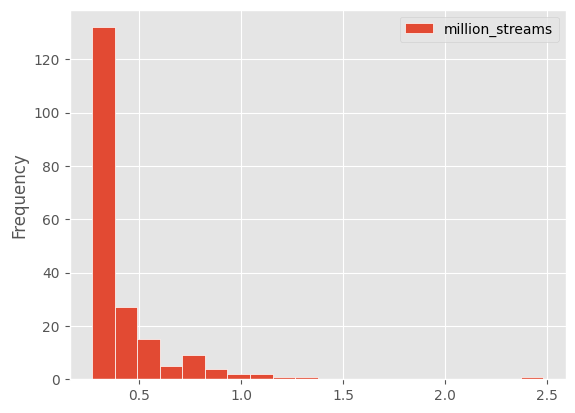

In [10]:
charts.plot(
    kind='hist',
    y='million_streams',
    bins=20,
    ec='w'
);

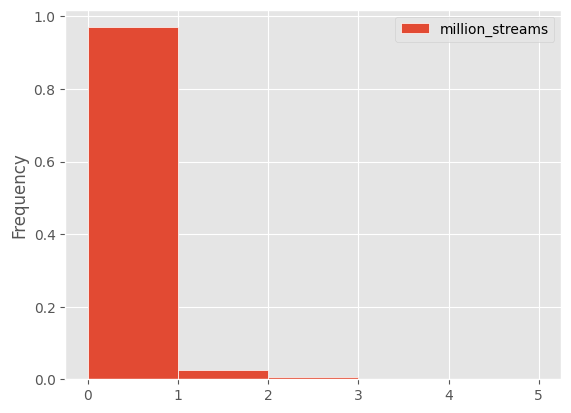

In [11]:
charts.plot(
    kind='hist', y='million_streams', density=True,
    bins=[0, 1, 2, 3, 4, 5],
    ec='w'
);

Nos dois histogramas acima, o que é diferente e o que é igual?

### Observações
- A forma geral de todos os dois histogramas é a mesma, independentemente dos compartimentos. Esta forma é chamada de *inclinada à direita*.
- Mais compartimentos fornecem uma imagem mais precisa e granular da distribuição da variável `'million_streams'`.
- Os valores do eixo $y$ parecem mudar muito quando mudamos os compartimentos. Agarre-se a esse pensamento; veremos o porquê em breve.

### Histogramas de densidade mostram a distribuição de variáveis ​​numéricas

Podemos também criar histogramas *normalizados* ou histogramas de densidade.

### Ideia chave por trás dos histogramas de densidade: a área total é 1

- Em um histograma de densidade, o eixo $y$ pode ser difícil de interpretar, mas foi projetado para dar ao histograma uma propriedade muito boa: $$\textbf{As barras de um histograma de densidade }$$
$$\textbf{têm uma área total combinada de 1.}$$
- Isso significa que a área de uma barra é igual à proporção de todos os pontos de dados que caem nessa caixa.
- Proporções e percentagens representam a mesma coisa.
- Uma proporção é um decimal entre 0 e 1, uma porcentagem está entre 0\% e 100\%.
- A proporção 0,34 significa 34\%.


### Cálculo de exemplo

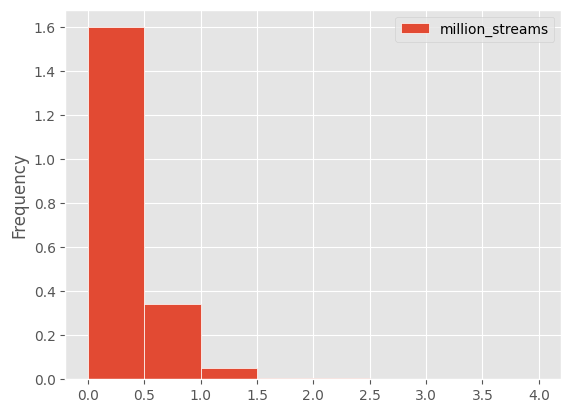

In [12]:
charts.plot(
    kind='hist',
    y='million_streams',
    density=True,
    bins=[0, 0.5, 1, 1.5, 2.5, 4],
    ec='w'
);

Com base neste histograma, que proporção das 200 músicas mais populares teve menos de meio milhão de streams?

### Exemplo de cálculo

- A altura da barra [0, 0.5) parece ser apenas 1,6.
- A largura da caixa é 0,5 - 0 = 0,5.

- Portanto, usando a fórmula da área de um retângulo,

$$\begin{align}\text{Area} &= \text{Altura} \times \text{Largura} \\ &= 1,6 \times 0,5 \\ e= 0,8
\end{align}$$

- Como as áreas representam proporções, isso significa que a proporção das 200 músicas mais populares com menos de 0,5 milhão de streams foi de aproximadamente 0,8 (ou 80\%).

### Verifique a matemática

In [13]:
first_bin = charts[charts.get('million_streams') < 0.5].shape[0]
first_bin

159

In [14]:
first_bin/200

0.795

Isso corresponde ao resultado que obtivemos. (Não exatamente, já que fizemos uma estimativa para a altura.)

### Como calcular alturas em um histograma de densidade

Como a barra de um histograma é um retângulo, sua área é dada por

$$\text{Área} = \text{Altura} \times \text{Largura}$$

Que significa

$$\text{Altura} = \frac{\text{Área}}{\text{Largura}} = \frac{\text{Proporção (ou Porcentagem)}}{\text{Largura}}$$

Isso implica que as unidades de altura são "proporção por (unidade $x$-eixo)". O eixo $y$ representa uma espécie de *densidade*, e é por isso que o chamamos de histograma de densidade.



Text(0, 0.5, 'Densidade')

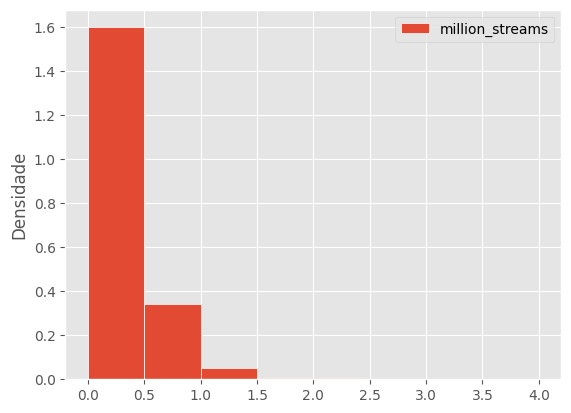

In [15]:
charts.plot(kind='hist', y='million_streams', density=True,
            bins=[0, 0.5, 1, 1.5, 2.5, 4],
            ec='w');
plt.ylabel('Densidade')

As unidades do eixo $y$ aqui são "proporção por milhão de fluxos", já que o eixo $x$ representa milhões de fluxos.
- Infelizmente, as unidades do eixo $y$ no histograma sempre são exibidas como "Frequência". **Isto está errado!**
- Podemos corrigir com `plt.ylabel(...)`

### Verificação de conceito ✅

Suponha que criamos um histograma de densidade dos tamanhos dos sapatos das pessoas. 👟 Abaixo estão as caixas que escolhemos junto com suas alturas.

| Caixa | Altura da barra |
| --- | --- |
| [3, 7) | 0,05 |
| [7, 10) | 0,1 |
| [10, 12) | 0,15 |
| [12, 16] | $X$ |


Qual deve ser o valor de $X$ para que este seja um histograma válido?

A. 0,02
B. 0,05
C. 0,2
D. 0,5
E. 0.7             


### Gráficos de barras vs. histogramas

Gráfico de barras | Histograma
---|---
Mostra a distribuição de uma variável categórica | Mostra a distribuição de uma variável numérica
1 eixo categórico, 1 eixo numérico | 2 eixos numéricos
As barras têm larguras e espaçamentos arbitrários, mas iguais | O eixo horizontal é numérico e está em escala
Os comprimentos das barras são proporcionais à quantidade numérica de interesse | A altura mede a densidade; as áreas são proporcionais à proporção (porcentagem) de indivíduos

### 🌟 Importante 🌟

Nesta aula, **"histograma" sempre significará um "histograma de densidade".** Usaremos **apenas** histogramas de densidade.

*Nota:* É possível criar o que é chamado de *histograma de frequência* onde o eixo $y$ simplesmente representa uma contagem do número de valores em cada compartimento. Embora sejam mais fáceis de interpretar, os histogramas de frequência não têm a importante propriedade de que a área total é 1, portanto não podem ser conectados à probabilidade da mesma forma que os histogramas de densidade. Isso os torna muito menos úteis para cientistas de dados.

## Gráficos sobrepostos

### Novo conjunto de dados: populações de San Diego e San Jose ao longo do tempo

Os dados para ambas as cidades vêm de [macrotrends.net](https://www.macrotrends.net/cities/23129/san-diego/population).

In [16]:
population = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/08-MaisViz/data/sd-sj-2022.csv').set_index('date')
population

,Pop SD,Growth SD,Pop SJ,Growth SJ
date,,,,
1970,1209000,3.69,1009000,4.34
1971,1252000,3.56,1027000,1.78
1972,1297000,3.59,1046000,1.85
1973,1344000,3.62,1064000,1.72
1974,1392000,3.57,1084000,1.88
1975,1442000,3.59,1103000,1.75
1976,1493000,3.54,1123000,1.81
1977,1547000,3.62,1143000,1.78
1978,1602000,3.56,1163000,1.75


### Lembre-se: gráficos de linha

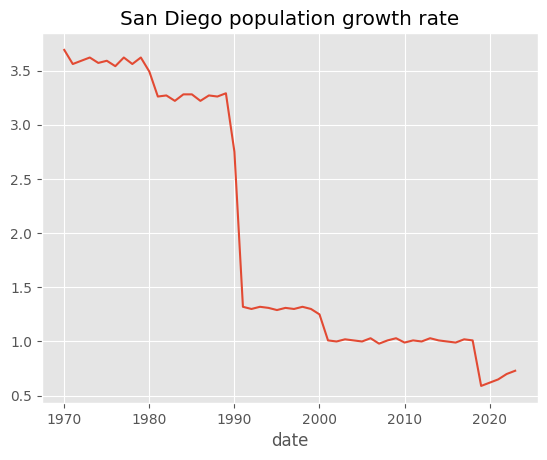

In [17]:
population.plot(kind='line', y='Growth SD', 
                title='San Diego population growth rate', legend=False);

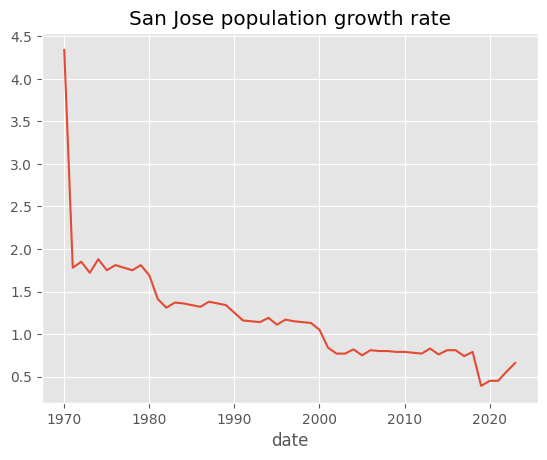

In [18]:
population.plot(kind='line', y='Growth SJ', 
                title='San Jose population growth rate', legend=False);

Observe os argumentos opcionais `title` e `legend`. Alguns outros argumentos opcionais úteis são `figsize`, `xlabel` e `ylabel`. Existem [many optional arguments](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

### Gráficos sobrepostos

Se `y=column_name` for omitido, **todas** colunas serão plotadas!

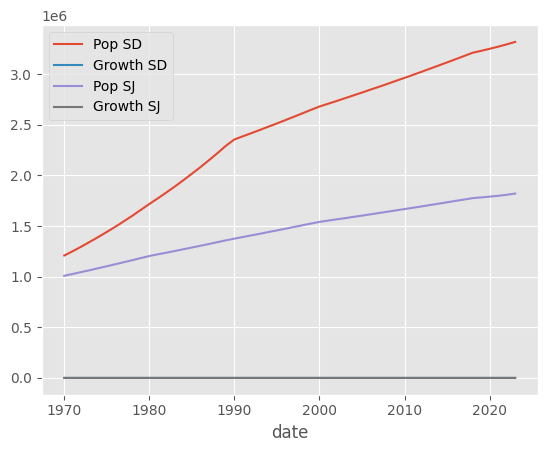

In [19]:
population.plot(kind='line');

Por que existem apenas três linhas mostradas, mas quatro na legenda? 🤔

### Selecionando várias colunas de uma vez
- Para selecionar várias colunas, use `.get([column_1, ..., column_k])`.
- Passar uma `lista` de rótulos de colunas para `.get` retorna um DataFrame.
- `.get([column_name])` retornará um DataFrame com apenas uma coluna!

In [20]:
growths = population.get(['Growth SD', 'Growth SJ'])
growths

,Growth SD,Growth SJ
date,,
1970,3.69,4.34
1971,3.56,1.78
1972,3.59,1.85
1973,3.62,1.72
1974,3.57,1.88
1975,3.59,1.75
1976,3.54,1.81
1977,3.62,1.78
1978,3.56,1.75


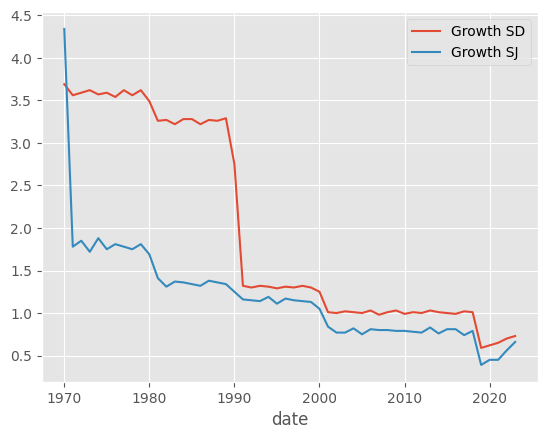

In [21]:
growths.plot(kind='line');

### Para traçar vários gráficos de uma vez:
* `.get` apenas as colunas que contêm informações relevantes para o seu gráfico.
* Equivalentemente, `.drop` todas as colunas estranhas.
* Especifique a coluna para o eixo $x$ (se não for o índice) em `.plot(x=column_name)`.
* Omita o argumento `y`. Então **todas** as outras colunas serão plotadas em um eixo $y$ compartilhado.

A mesma coisa funciona para `'barh'`, `'bar'` e `'hist'`, mas não para `'scatter'`.

### Novo conjunto de dados: alturas das crianças e de seus pais 👪 📏

- Os dados abaixo foram coletados no final de 1800 por [Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton).
- Ele era eugenista e defensor do racismo científico, por isso coletou esses dados.
- Hoje entendemos que a eugenia é imoral e que não há evidências científicas ou qualquer outra justificativa para o racismo.
- Revisitaremos esse conjunto de dados posteriormente no curso.
- Por enquanto, precisaremos apenas das colunas `'mother'` e `'childHeight'`.

In [22]:
mother_child = pd.read_csv('https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/08-MaisViz/data/galton.csv').get(['mother', 'childHeight'])
mother_child

,mother,childHeight
0,67.0,73.2
1,67.0,69.2
2,67.0,69.0
3,67.0,69.0
4,66.5,73.5
...,...,...
929,66.0,64.0
930,66.0,62.0
931,66.0,61.0
932,63.0,66.5


### Plotando histogramas sobrepostos

`alpha` controla o quão transparentes as barras são (`alpha=1` é opaco, `alpha=0` é transparente).

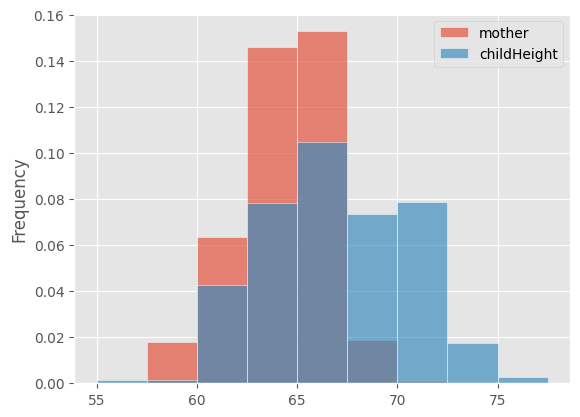

In [23]:
height_bins = np.arange(55, 80, 2.5)
mother_child.plot(kind='hist', density=True, ec='w',
                  alpha=0.65, bins=height_bins);

Por que as crianças parecem muito mais altas que as mães?

### Prática Extra

Tente responder a estas perguntas com base no histograma sobreposto.

1. Qual proporção de crianças tinha entre 70 e 75 polegadas de altura?

2. Qual proporção de mães tinha entre 60 e 63 polegadas de altura?

<h3>Respostas</h3>
<details>
<summary>Clique aqui para mostrar.</summary>

<b>Pergunta 1</b>

A altura da barra $[70, 72.5)$ é em torno de $0,08$, o que significa que $0,08 \cdot 2,5 = 0,2$ de crianças tinham altura nesse intervalo. A altura da barra $[70, 72.5)$ é em torno de $0,02$, o que significa $0,02 \cdot 2,5 = 0,05$ de crianças tinham altura nesse intervalo. Assim, a proporção geral de crianças que tinham entre $70$ e $75$ polegadas de altura era de cerca de $0,20 + 0,05 = 0,25$, ou $25\%$.

Para verificar nossa resposta, podemos executar

<code>heights[(heights.get('childHeight') >= 70) & (heights.get('childHeight') < 75)].shape[0] / heights.shape[0]</code>

<b>Pergunta 2</b>

Não podemos dizer. Poderíamos tentar dividir na proporção de mães em $[60, 62.5)$ e $[60, 62.5)$, mas não sabemos o último. Na ausência de qualquer informação adicional, não podemos inferir sobre a distribuição de valores dentro de um compartimento. Por exemplo, pode ser que todos no intervalo $[60, 62.5)$ realmente caiam no intervalo $[60, 62.5)$ - ou pode ser que ninguém caia!

</details>

## Resumo, da próxima vez

### Resumo

- Histogramas (não gráficos de barras!) são usados ​​para exibir a distribuição de uma variável numérica.
- Sempre usaremos histogramas de densidade.
- Em histogramas de densidade, a área de uma barra representa a proporção (porcentagem) de valores dentro de seu compartimento.
- A área total de todas as barras é 1 (100%).
- Podemos sobrepor vários gráficos de linhas, gráficos de barras e histogramas uns sobre os outros para observar vários relacionamentos ou distribuições.

### Próxima vez

- Escrevendo nossas próprias funções.
- Aplicar funções aos dados num DataFrame.